In [1]:
import graphviz as gv #Graficos
import numpy as np
import heapq as hq
import pandas as pd #Leer CSV
import matplotlib.pyplot as plt # Gragicos final
import math as math #Operaciones matematicas
from timeit import timeit

def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [2]:
%%file 1.in
1|4 7|8 14|3
2|7 5|7
5|4 1|7 3|5 6|1
2|5
7|7
1|7 6|1 8|5
2|1 5|1
0|8 4|7 8|8
5|5 7|8 9|8 11|9 12|6
8|8 10|8 12|9 13|7
9|8 13|3
8|9
8|6 9|9 13|2 15|5
9|7 10|13 12|2 16|9
0|3 15|9
12|5 14|9 17|7
13|9 17|8
15|7 16|8


Writing 1.in


 0: [(1, 4), (7, 8), (14, 3)]
 1: [(2, 7), (5, 7)]
 2: [(5, 4), (1, 7), (3, 5), (6, 1)]
 3: [(2, 5)]
 4: [(7, 7)]
 5: [(1, 7), (6, 1), (8, 5)]
 6: [(2, 1), (5, 1)]
 7: [(0, 8), (4, 7), (8, 8)]
 8: [(5, 5), (7, 8), (9, 8), (11, 9), (12, 6)]
 9: [(8, 8), (10, 8), (12, 9), (13, 7)]
10: [(9, 8), (13, 3)]
11: [(8, 9)]
12: [(8, 6), (9, 9), (13, 2), (15, 5)]
13: [(9, 7), (10, 13), (12, 2), (16, 9)]
14: [(0, 3), (15, 9)]
15: [(12, 5), (14, 9), (17, 7)]
16: [(13, 9), (17, 8)]
17: [(15, 7), (16, 8)]


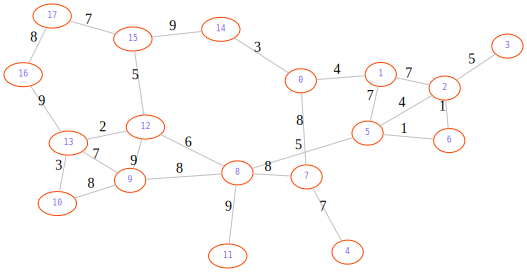

In [3]:
G, _ = readAdjl("1.in", weighted=True)
for i, edges in enumerate(G):
  print(f"{i:2}: {edges}")
adjlShow(G, weighted=True)

### Hugo Quispe Chavez (Bellman Ford)





Es un algoritmo para grafos cíclicos y su peculiaridad es que funciona para aristas negativas (caminos con valor negativo)

Si este algoritmo encuentra ciclos alcanzables para el origen, lanza un mensaje que no es posible hallar un SP.

El algoritmo de bellman-Form la funsion especifica es calcular la ruta mas corta de un digrafo ponderado desde un vertice de origen,
Analisando la complejidad de este algoritmo podemos percarnos que es O(n^3)

In [4]:
def bellmanFord(G, s):
  n = len(G)                            # 1                           # Del arreglo que obtuviste de los parametros sacas su tamaño
  cost = [float('inf')]*n               # 2                           # creas un arreglo vacio con valores super altos con tamaño de n
  cost[s] = 0                           # 1                           # en la pos de S le das costo 0 para que inicie de ahi
  path = [-1]*n                         # 1                           # y un arreglo de caminos con valor -1 para poder almacenar los 
                                                                   # valores reales de los nodos.

  for _ in range(n-1):                  # n * ( ...                   # crear un for para recorrer el arreglo
    for u in range(n):                    # n * ( ...                 # para recorrer los nodos del arreglo
      for v, w in G[u]:                     # n * ( ...               # para obtener los valores de los nodos (nodo, valor)
        if cost[u] + w < cost[v]:       # 4                           # condicional para ver si el peso supera o no al otro camino de v
          cost[v] = cost[u] + w         # 4                           # si es asi... actualiza el costo
          path[v] = u                   # 2                           # y actualiza al padre

  for u in range(n):                    # n * ( ...                   # este for es para ver si tiene caminos negativos
    for v, w in G[u]:                     # n * ( ...                 # para obterner los valores de los nodos
      if cost[u] + w < cost[v]:             # n * ( ...               # si ese canimo es mayor o no
        return None, None                      # 1                     # retorna el none para decir que no es posible

  return path, cost                            # 2                    # retorna el path y cost